In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Ecommerce Customers')

In [4]:
dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
dataset.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [6]:
dataset.shape

(500, 8)

In [7]:
dataset = dataset.drop(['Email',"Address","Avatar"], axis=1)
dataset.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
dataset.shape

(500, 5)

In [9]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
dataset.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

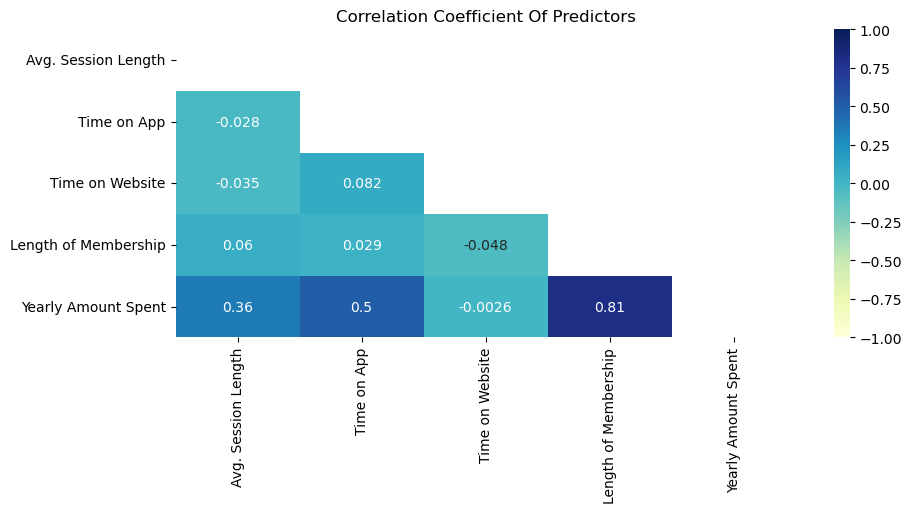

In [11]:
# set figure size
plt.figure(figsize=(10,4))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(dataset.corr(), dtype=bool))

# generate heatmap
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
# Interpretation: The above heatmap shows that

Length of Membership is highly correlated with Yearly Amount Spend
Time on APP is more correlated than Time on Website

Avg. Session Length        Axes(0.125,0.11;0.133621x0.77)
Time on App             Axes(0.285345,0.11;0.133621x0.77)
Time on Website          Axes(0.44569,0.11;0.133621x0.77)
Length of Membership    Axes(0.606034,0.11;0.133621x0.77)
Yearly Amount Spent     Axes(0.766379,0.11;0.133621x0.77)
dtype: object

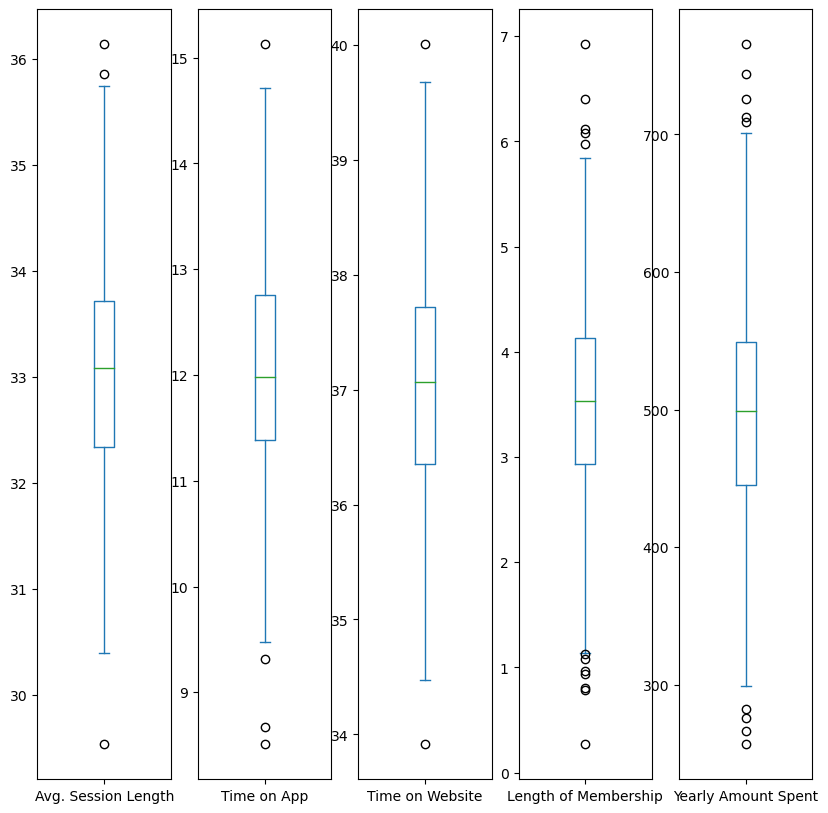

In [12]:
#Removing outliers using IQR & Boxplot
dataset.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10, 10)
)

In [14]:
 #Counting number of points as outliers
for i in range(len(dataset.columns)):
    a = dataset.columns[i]
    Q1 = dataset[a].quantile(0.25)
    Q3 = dataset[a].quantile(0.75)
    IQR = Q3 - Q1
    print(a,':',dataset[(dataset[a] < (Q1 - 1.5 * IQR)) |(dataset[a] > (Q3 + 1.5 * IQR))][a].shape[0],'\n')

Avg. Session Length : 3 

Time on App : 4 

Time on Website : 2 

Length of Membership : 12 

Yearly Amount Spent : 9 



In [ ]:
#Interpretation: We can see that there are outliers on every columns so we caluclated the number of outliers on every columns.

In [15]:
dataset_2=dataset.copy()

In [16]:
dataset.shape

(500, 5)

In [17]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset=dataset[~((dataset< (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(476, 5)

In [18]:
dataset

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [19]:
for i in range(len(dataset.columns)):
    a = dataset.columns[i]
    Q1 = dataset[a].quantile(0.25)
    Q3 = dataset[a].quantile(0.75)
    IQR = Q3 - Q1
    print(a,':',dataset[(dataset[a] < (Q1 - 1.5 * IQR)) |(dataset[a] > (Q3 + 1.5 * IQR))][a].shape[0],'\n')

Avg. Session Length : 0 

Time on App : 0 

Time on Website : 0 

Length of Membership : 3 

Yearly Amount Spent : 1 



Avg. Session Length        Axes(0.125,0.11;0.133621x0.77)
Time on App             Axes(0.285345,0.11;0.133621x0.77)
Time on Website          Axes(0.44569,0.11;0.133621x0.77)
Length of Membership    Axes(0.606034,0.11;0.133621x0.77)
Yearly Amount Spent     Axes(0.766379,0.11;0.133621x0.77)
dtype: object

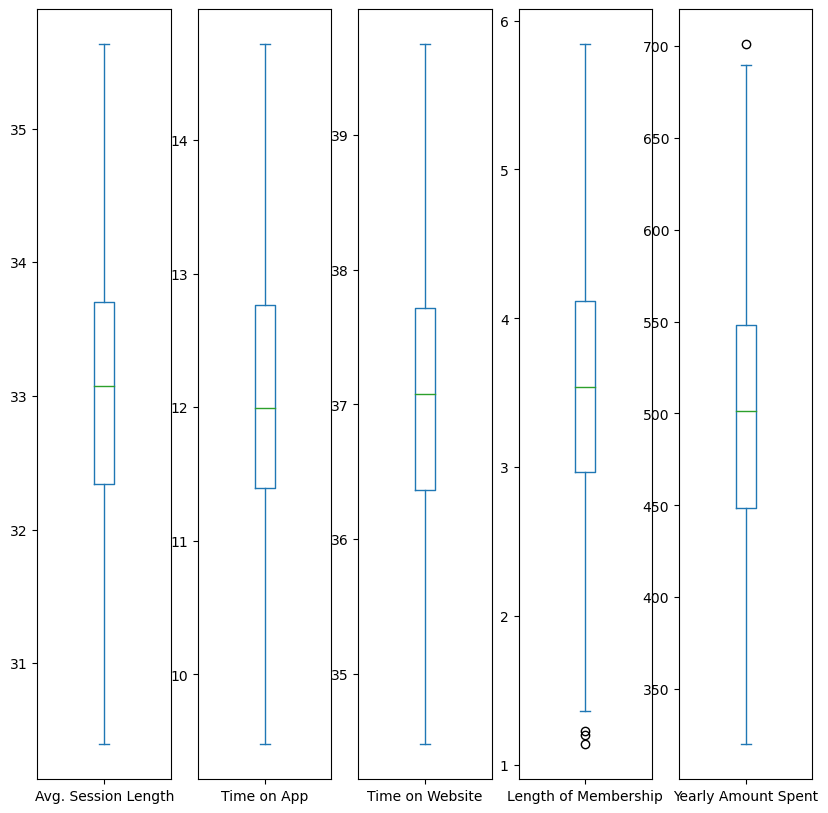

In [20]:
dataset.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(10, 10)
)

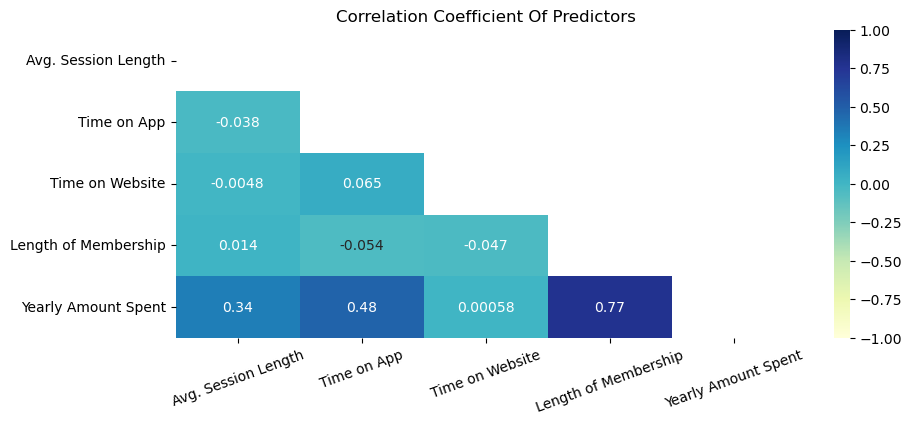

In [21]:
# set figure size
plt.figure(figsize=(10,4))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(dataset.corr(), dtype=bool))

# generate heatmap
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.xticks(rotation=20)
plt.show()

In [ ]:
#Interpretation: After removing outliers, the correlation matrix is not affected. And the relationship between input and output target variable is in same ratio as before removing outliers.

In [22]:
dataset_3 = dataset_2.copy()

In [25]:
dataset_3.shape

(500, 5)

In [26]:
dataset_3.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


In [27]:
# Making bins for Yearly Amount Spent to better understand distribution of data

bins= np.arange(200,800,100)
dataset_3['bins'] = pd.cut(x=dataset_3['Yearly Amount Spent'],bins = bins)

In [28]:
dataset_3['bins'].value_counts()

bins
(500, 600]    207
(400, 500]    204
(300, 400]     42
(600, 700]     36
(200, 300]      5
Name: count, dtype: int64

In [29]:
dataset_3['bins'] = dataset_3['bins'].astype("object")

In [30]:
dataset_3['bins'].isna().sum()

6

In [31]:
dataset_3['bins'].fillna(value='(700, 800]',inplace = True)

In [32]:
dataset_3['bins'].value_counts()

bins
(500, 600]    207
(400, 500]    204
(300, 400]     42
(600, 700]     36
(700, 800]      6
(200, 300]      5
Name: count, dtype: int64

In [33]:
dataset_3.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'bins'],
      dtype='object')

In [34]:
# Grouping data based on the bins

dataset_3=dataset_3.groupby(['bins']).agg({'Time on App':'mean','Time on Website':'mean',
'Length of Membership':'mean','Avg. Session Length':'mean'}).rename(columns={'Time on App':'Avg Time on App',
'Time on Website':'Avg Time on Website','Length of Membership':'Avg Length of Membership',
'Avg. Session Length':'Avg Session Length'})

In [35]:
dataset_3.index = dataset_3.index.rename('Total Amount spent in range:')

In [36]:
dataset_3.head(10)

,Avg Time on App,Avg Time on Website,Avg Length of Membership,Avg Session Length
Total Amount spent in range:,,,,
"(200, 300]",11.232761,36.955327,1.117212,31.638514
"(300, 400]",11.163955,36.865263,2.153811,32.609169
"(400, 500]",11.832933,37.088564,3.096121,32.787376
"(500, 600]",12.244767,37.091465,4.002326,33.336777
"(600, 700]",13.107604,37.012028,4.884436,33.427407
"(700, 800]",13.455873,36.778602,5.792474,34.349148


In [ ]:
#Interpretation: All the columns show a positive increment except for Avg Time on Website

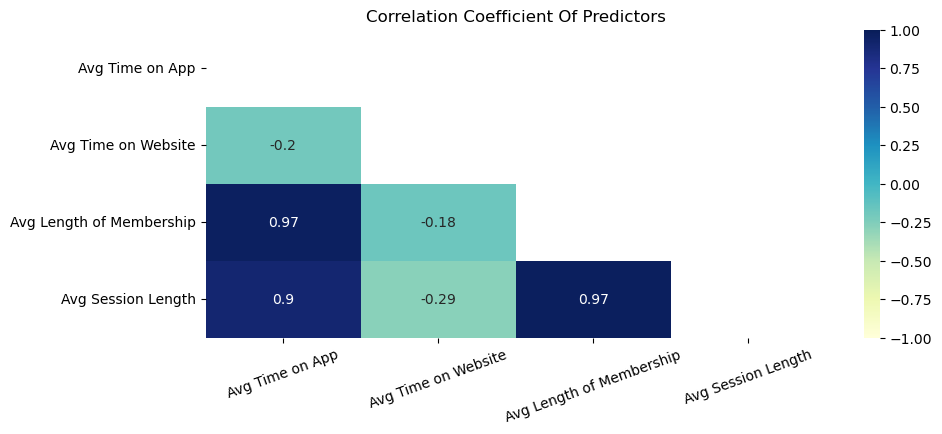

In [37]:
# set figure size
plt.figure(figsize=(10,4))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(dataset_3.corr(), dtype=bool))

# generate heatmap
sns.heatmap(dataset_3.corr(), annot=True, cmap='YlGnBu', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.xticks(rotation=20)
plt.show()

In [ ]:
#Interpretation: verifying correlation matrix after performing aggregate mean on all the columns

In [38]:
dataset_4 = dataset_3.copy()

In [39]:
from sklearn.model_selection import train_test_split

X=dataset_2[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
y=dataset_2['Yearly Amount Spent']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
#Training a model=80% Testing the trained model=20%

SyntaxError: invalid syntax (3379550234.py, line 1)

In [41]:
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (400, 4)
shape of y_train =  (400,)
shape of X_test =  (100, 4)
shape of y_test =  (100,)


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
scaler.mean_

array([33.05718949, 12.07144724, 37.09893896,  3.53246119])

In [44]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
238,31.260647,13.266760,36.971195,2.267251
438,32.149061,10.047315,37.181447,3.535088
475,33.811733,11.186809,36.298893,4.301996
58,32.843930,11.832286,36.814011,3.471919
380,33.385990,12.782172,35.550772,3.228718
...,...,...,...,...
255,33.136655,13.891313,39.220713,2.907095
72,32.386252,10.674653,38.006583,3.401522
396,35.742670,10.889828,35.565436,6.115199
235,33.177205,11.622777,35.968896,3.634094


In [45]:
X_train_scaled

array([[-1.82215970e+00,  1.20586307e+00, -1.25495201e-01,
        -1.27275213e+00],
       [-9.21078072e-01, -2.04199771e+00,  8.10559590e-02,
         2.64289473e-03],
       [ 7.65303030e-01, -8.92446434e-01, -7.85962739e-01,
         7.74122589e-01],
       ...,
       [ 2.72377284e+00, -1.19204805e+00, -1.50650860e+00,
         2.59813373e+00],
       [ 1.21726482e-01, -4.52630076e-01, -1.11015121e+00,
         1.02238376e-01],
       [-1.94598101e-01, -8.77978502e-02, -5.36168387e-02,
        -8.05499331e-02]])

In [46]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
np.round(X_train.describe(),1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,400.0,400.0,400.0,400.0
mean,33.1,12.1,37.1,3.5
std,1.0,1.0,1.0,1.0
min,29.5,8.5,33.9,0.3
25%,32.4,11.4,36.4,2.9
50%,33.1,12.0,37.1,3.5
75%,33.7,12.8,37.7,4.1
max,36.1,14.7,40.0,6.9


In [48]:
np.round(X_test_scaled.describe(),1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,100.0,100.0,100.0,100.0
mean,-0.0,-0.1,-0.2,0.0
std,1.0,1.0,0.9,1.0
min,-2.7,-3.4,-2.6,-2.7
25%,-0.9,-0.7,-0.8,-0.6
50%,0.1,-0.1,-0.2,0.1
75%,0.7,0.6,0.5,0.6
max,2.5,3.1,1.9,2.0


Text(0.5, 1.0, 'After Scaling')

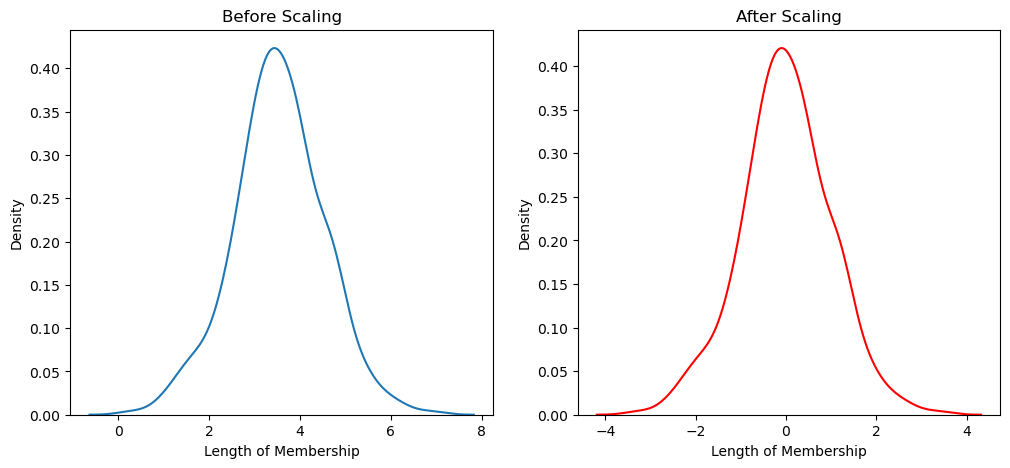

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train['Length of Membership'], ax=ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_scaled['Length of Membership'], ax=ax2, color='red')
ax2.set_title('After Scaling')

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred=lr.predict(X_test)

In [52]:
y_pred

array([498.7228681 , 519.59228344, 563.13904069, 478.91915652,
       423.41266838, 508.9555034 , 478.76101633, 460.0534163 ,
       519.38968483, 438.96457911, 487.62519476, 525.92536473,
       577.18547575, 553.7066461 , 685.60452684, 473.39014425,
       314.1945817 , 458.030198  , 452.4612251 , 461.03168755,
       456.28708189, 332.06929726, 504.03498428, 401.56582625,
       766.63520004, 426.08349764, 513.37904373, 476.9128933 ,
       306.33083848, 590.22648801, 505.28052114, 389.98117113,
       463.78603542, 315.72068062, 465.83129961, 549.68040427,
       620.1610288 , 591.95902606, 495.80365357, 402.73437857,
       507.05480493, 547.73248629, 422.68457762, 558.79136007,
       442.02693944, 432.71267857, 430.23835177, 507.05828181,
       425.57805969, 401.99227084, 553.16953956, 353.36551475,
       639.65600563, 478.48345842, 452.01425715, 621.7991521 ,
       325.77117572, 491.50118041, 411.66626102, 549.18504412,
       587.96534365, 548.30580216, 567.82460456, 589.07

In [53]:
print("Training scores and Testing Scores")
print("-"*40)
print("Training score : "+str(lr.score(X_train,y_train)))
print("Testing score : "+str(lr.score(X_test,y_test)))

Training scores and Testing Scores
----------------------------------------
Training score : 0.982744812260463
Testing score : 0.9892888134002329


In [54]:
# Regression metrics

import sklearn.metrics as metrics

explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
adj_r2 =1-((1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1])-1))

print('explained_variance: ', round(explained_variance,4))
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('Adj r2: ', round(adj_r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9898
mean_squared_log_error:  0.0003
r2:  0.9893
Adj r2:  0.9997
MAE:  6.8232
MSE:  78.2957
RMSE:  8.8485


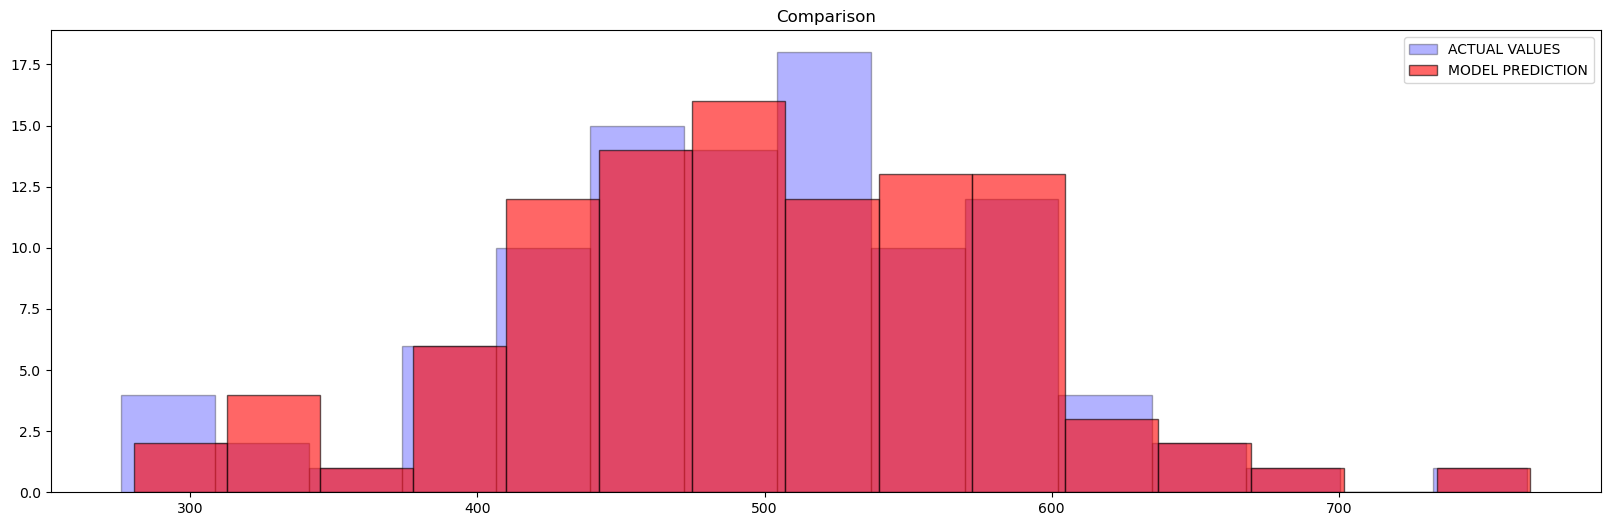

In [55]:
plt.figure(figsize=(20,6))
plt.hist(y_test, color='blue', ec='black', bins=15, alpha = 0.3)
plt.hist(y_pred, color='red', ec='black', bins=15, alpha= 0.6)
plt.title("Comparison")
plt.legend(["ACTUAL VALUES" , "MODEL PREDICTION"])
plt.show()

In [ ]:
#Interpretation: The histogram plot shows combine plot for the testing values of y and predicted values of y.

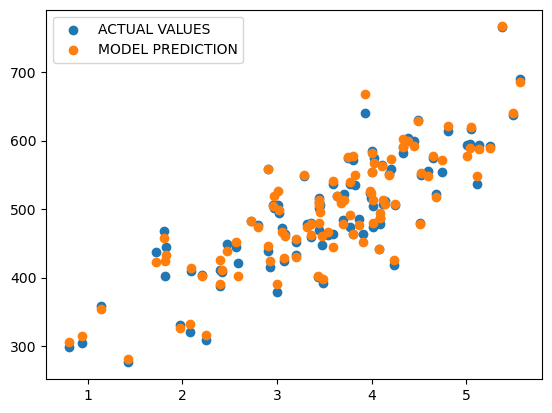

In [56]:
#plt.scatter(x=dataset_2['Length of Membership'],y=dataset_2['Yearly Amount Spent']);
plt.scatter(x=X_test['Length of Membership'],y=y_test)
plt.scatter(x=X_test['Length of Membership'],y=y_pred)
plt.legend(["ACTUAL VALUES" , "MODEL PREDICTION"])

In [ ]:
#Interpretation: The scatterplot maps 2 plots in the same figure depicting initial actual values of input dataset and predicted model data of Length of Membership vs Yearly Amount Spend. As length of membership value increases, The Yearly amount spent value increases linearly.